In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt



In [2]:
#Adding the dataset

data= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
#The head () function is used to get the first n rows.
#It is helpful for quickly testing if your object has the right type of data in it.
#For negative values of n,the head () function returns all rows except the last n rows, equivalent to df [:-n].

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# > **Data and Dataset**

Now split data into dev and training set
Risk-*Overfitting*
It may happen that your model maybe exactly figuring out the exact pridiction for your *"*training data"* *
but not generalize data where you actually want to
that's *Dev/Cross-Validation Data *where you don't want to generalize-test performance data


In [4]:
#Now split data into dev and training set
data=np.array(data)
m,n = data.shape
np.random.shuffle(data)


#T for transpose so that each column is eg rather than each row for convinence
data_dev=data[0:1000].T
#assigns the first column of the data_dev wiht the target variables/dependent variables of dataset
Y_dev=data_dev[0]
#assigning values to each target variable
X_dev=data_dev[1:n]
#X_dev now contains the input variables (or independent variables) for the first 1000 rows of the original data.
#normalization of pixeles 
X_dev=X_dev/255.

data_train= data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255.

#assigning the number of columns( which should be equal to m-1000) to m_train
#The first dimension (the number of rows, which should be equal to n-1) is ignored by using the _ symbol, 
_,m_train=X_train.shape



# **Why / by 255?**
* -It is a common normalization step for image data that has pixel values ranging from 0 to 255. 
* -This will rescale the input variables to have values between 0 and 1, which can make it easier for machine learning algorithms to learn patterns in the data.

# > **Starting with Neural Network**

In [5]:
#Initializing parameters
def init_params():
    #784 pixels to 10 classes
    #10*784 matrix is drawn drawn from a standard normal distribution with a mean of 0 and a standard deviation of 1.
    #shifting the range of values from (0,1) to (-0.5,0.5)
    W1=np.random.randn(10,784)- 0.5  
    #initializes the bias vector b1 for the first layer of the network as a 10 x 1 column vector of random numbers
    b1=np.random.randn(10,1)- 0.5
    #initializes the weight matrix W2 for the second layer of the network as a 10 x 10 matrix of random numbers
    #each neuron in the second layer is connected to all the neurons in the first layer
    W2=np.random.randn(10,10)- 0.5
    b2=np.random.randn(10,1)- 0.5
    return W1,b1,W2,b2
    
    

#  Why 0.5 deviation required?
This is a common practice in neural network initialization to ensure that the initial weights are not too large or too small, which can lead to poor performance or slow convergence during training.

In [6]:
    #Forward propagation
    def ReLU(Z):   #Rectified Linear Unit
        return np.maximum(Z,0)  #returns if >0 return Z else 0
    def SoftMax(Z):    #produce a probability distribution over the possible output classes.
        A= np.exp(Z)/ np.sum(np.exp(Z))
        return A
    #np.sum preserves columns and collapses rows to one row and we want sum of each columns
    
    def forward_prop(W1,b1,W2,b2,X):
        Z1=W1.dot(X)+b1
        A1=ReLU(Z1)
        Z2=W2.dot(A1)+b2
        A2=SoftMax(A1)
        return Z1,A1,Z2,A2
    
    
    
  
 

The function creates an array of zeros called one_hot_Y with dimensions (Y.size, Y.max()+1). The Y.max()+1 term ensures that there is a column in one_hot_Y for each unique value in Y. For example, if Y contains values ranging from 0 to 2, then one_hot_Y will have 3 columns.

The function uses NumPy's arange function to generate an array of integers from 0 to Y.size - 1. This array is used to index into one_hot_Y along the first axis (i.e., the rows).

The function uses the original Y array to index into one_hot_Y along the second axis (i.e., the columns) and set the corresponding elements to 1. This step creates the one-hot encoded version of Y.

The function returns the one-hot encoded Y array.

In [7]:
#Back propagation
#first it creates one new matrix one hot Y with np zeros
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1  #Y.size=row & Y column
    #go to each row and column specified by the label in Y and turn it into 1
    one_hot_Y=one_hot_Y.T
    #right now each row was eg we wanted columns to be an eg
    return one_hot_Y

def deriv_ReLU(Z):
    return Z>0   #consider the graph

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y=one_hot(Y)
    #dZ2=error in second layer
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    #computes the error in the first layer
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    #It uses this error to compute the gradients of the weight matrix and bias vector for the first layer, dW1 and db1, respectively.
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2
    
    

    


The **get_accuracy** function takes two arguments, predictions and Y. 
* -Here, predictions is an array of predicted class labels, 
* and Y is an array of true class labels.
 
The function first compares the predicted labels with the true labels using the == operator, which returns a boolean array of the same shape as the inputs, where True indicates that the predicted and true labels match, and False otherwise.

The function then sums up the number of True values in this boolean array using the numpy sum function. Since True is equivalent to 1 in boolean arithmetic, this gives us the number of correctly classified examples.

Finally, the function divides the number of correctly classified examples by the total number of examples in the Y array, which is given by the size attribute of the array. This gives us the proportion of correctly classified examples, or the accuracy of the model.

The output of the function is the accuracy as a float between 0 and 1.

In [8]:
#determine the predicted class label for a given input.
def get_predictions(A2):
    return np.argmax(A2, 0)     #returns the index of the maximum value along axis 0

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [9]:
#alpha-learning rate
def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        #computes the gradients of the loss with respect to the weights and biases.
        dW1,db1,dW2,db2=back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if(i%10==0):
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1,b1,W2,b2

In [10]:
W1,b1,W2,b2= gradient_descent(X_train,Y_train,500,0.10)

Iteration:  0
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  10
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  20
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  30
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  40
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  50
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  60
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  70
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  80
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  90
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  100
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  110
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  120
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Iteration:  130
[0 0 0 ... 0 0 0] [5 9 2 ... 7 9 6]
0.09831707317073171
Ite

_, _, _, A2 = forward_prop(W1, b1, W2, b2, X)

the activations of the hidden layer A1 are not needed
The activations of the output layer A2 contain the network's predictions for each input example. 
To obtain these predictions, we only need to compute the output of the last layer.
The activations of the hidden layer A1 are not used for making predictions, but they are necessary for computing the gradients during backpropagation.

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    #first computes the output of the last layer using the forward_prop function
    #returns the activation values of the last layer A2
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    #to obtain the predicted class labels for each input example.
    predictions = get_predictions(A2)
    return predictions

#function to obtain the predicted class label for the input example
def test_prediction(index, W1, b1, W2, b2):
    #making 2D numpy array of shape (784, 1), where each row corresponds to a single pixel in the flattened 28x28 image.
    current_image = X_train[:, index, None]
    #single integer representing the predicted label for the input image.
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    #retrieves the true label of the input image from the training set 
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    #reshape the flattened input image 
    #The plt.gray() call sets the colormap of the plot to grayscale.
    #The plt.imshow() call displays the image on the screen using matplotlib.
    #The plt.show() call actually shows the plot on the screen.
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  5


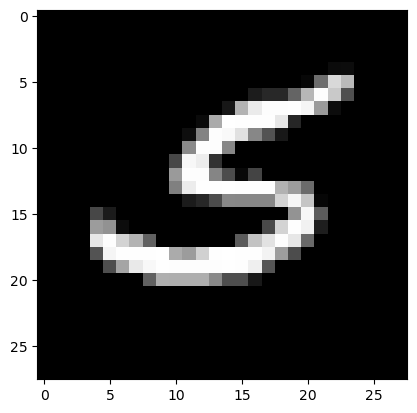

Prediction:  [0]
Label:  9


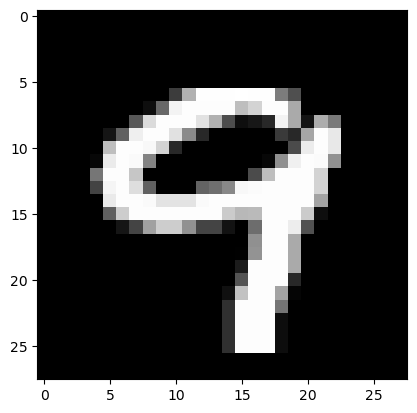

Prediction:  [0]
Label:  2


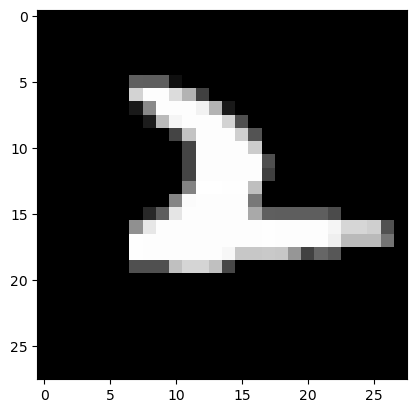

Prediction:  [0]
Label:  8


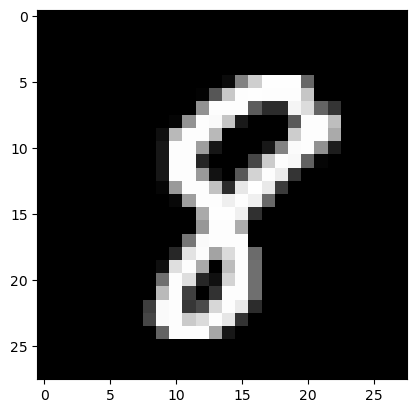

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [13]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

0.101